In [19]:
import numpy as np
import pandas as pd
import math
from math import sqrt
from numpy import mean
from numpy.random import rand
from numpy.random import randn
import matplotlib.pyplot as plt

In [20]:
df = pd.read_csv('game_data.csv')
df.head(10)

,-88.06688725,287.9,0.2,0
0,-88.066887,287.7,0.3,0.04
1,-88.106887,287.4,0.4,0.00
2,-88.106887,287.0,0.5,0.04
3,-88.146887,286.5,0.6,0.00
4,-88.146887,285.9,0.7,0.04
5,-88.186887,285.2,0.8,0.00
6,-88.186887,284.4,0.9,0.04
7,-88.226887,283.5,1.0,0.00
8,-88.226887,282.5,1.1,0.04
9,-88.266887,281.4,1.2,0.00


In [21]:
df.columns = ["Input_X", "Input_Y", "Velocity_Y", "Velocity_X"]
df

,Input_X,Input_Y,Velocity_Y,Velocity_X
0,-88.066887,287.700000,0.300000,0.040000
1,-88.106887,287.400000,0.400000,0.000000
2,-88.106887,287.000000,0.500000,0.040000
3,-88.146887,286.500000,0.600000,0.000000
4,-88.146887,285.900000,0.700000,0.040000
...,...,...,...,...
114357,37.359846,87.610401,5.072313,-0.021098
114358,37.380944,82.538089,5.172313,0.018902
114359,37.362041,77.365776,5.272313,-0.021098
114360,37.383139,72.093463,5.372313,0.018902


In [22]:
df = df[['Input_X', 'Input_Y', 'Velocity_X', 'Velocity_Y']]
df

,Input_X,Input_Y,Velocity_X,Velocity_Y
0,-88.066887,287.700000,0.040000,0.300000
1,-88.106887,287.400000,0.000000,0.400000
2,-88.106887,287.000000,0.040000,0.500000
3,-88.146887,286.500000,0.000000,0.600000
4,-88.146887,285.900000,0.040000,0.700000
...,...,...,...,...
114357,37.359846,87.610401,-0.021098,5.072313
114358,37.380944,82.538089,0.018902,5.172313
114359,37.362041,77.365776,-0.021098,5.272313
114360,37.383139,72.093463,0.018902,5.372313


In [23]:
x1_min = min(df['Input_X'])
x1_max = max(df['Input_X'])
x2_min = min(df['Input_Y'])
x2_max = max(df['Input_Y'])
y1_min = min(df['Velocity_X'])
y1_max = max(df['Velocity_X'])
y2_min = min(df['Velocity_Y'])
y2_max = max(df['Velocity_Y'])

my_dict = {'x1_min' : x1_min, 'x1_max' : x1_max, 'x2_min' : x2_min, 'x2_max' : x2_max, 'y1_min' : y1_min, 'y1_max' : y1_max,
           'y2_min' : y2_min, 'y2_max' : y2_max}

min_max = pd.DataFrame(my_dict, index=[0])
#min_max.to_csv('min_max.csv')

In [24]:
# Scaling the data
df.iloc[:,:] = df.iloc[:,:].apply(lambda x: (x-x.min())/ (x.max()-x.min()), axis=0)

## Check for duplicates and null values

In [25]:
df.duplicated().sum()

0

In [26]:
df.isnull().sum()

Input_X       0
Input_Y       0
Velocity_X    0
Velocity_Y    0
dtype: int64

## Split data to train, validation and test

In [27]:
#Creating train dataset from 70% of the total data
train = df.sample(frac = 0.7)
train.sort_index(inplace = True)
len(train)

80053

In [28]:
#creating 30% val_test data by droping training indices from the datase
val_test = df.drop(train.index)
len(val_test)

34309

In [29]:
#creating 50% test set and 50% validation set from val_test dataset
val = val_test.sample(frac = 0.5)
val.sort_index(inplace = True)

test = val_test.drop(val.index)

print(len(train))
print(len(val))
print(len(test))

80053
17154
17155


In [30]:
# Creating array from training, testing and validation sets
X_train = train[['Input_X', 'Input_Y']].values
Y_train = train[['Velocity_X', 'Velocity_Y']].values

X_val = val[['Input_X', 'Input_Y']].values
Y_val = val[['Velocity_X', 'Velocity_Y']].values

X_test = test[['Input_X', 'Input_Y']].values
Y_test = test[['Velocity_X', 'Velocity_Y']].values

In [31]:
print('Training Data Shape   : ', X_train.shape)
print('Training Labels Shape : ', Y_train.shape)

print('Validation Data Shape    : ', X_val.shape)
print('Validation Labels Shape  : ', Y_val.shape)

print('Testing Data Shape   : ', X_test.shape)
print('Testing Labels Shape : ', Y_test.shape)

Training Data Shape   :  (80053, 2)
Training Labels Shape :  (80053, 2)
Validation Data Shape    :  (17154, 2)
Validation Labels Shape  :  (17154, 2)
Testing Data Shape   :  (17155, 2)
Testing Labels Shape :  (17155, 2)


### Building Neural Network Model

In [32]:
# example of the normalized xavier weight initialization
n = 10
# calculate the range for the weights
lower, upper = -(1.0 / sqrt(n)), (1.0 / sqrt(n))
# generate random numbers
numbers = rand(3*8)
# scale to the desired range
scaled = lower + numbers * (upper - lower)
# summarize
npp = scaled.reshape(3,8)
npp

array([[ 0.18213645,  0.12295853,  0.18934775, -0.16467862, -0.09370407,
        -0.15915627, -0.00038355, -0.20863105],
       [ 0.27001853,  0.07745365, -0.26990264,  0.28111838,  0.00355866,
        -0.10449742,  0.29663307,  0.28154887],
       [-0.10002473, -0.13464757, -0.20051265,  0.05193411, -0.10521216,
         0.29519225,  0.21699685, -0.05033613]])

In [33]:
# example of the he weight initialization
# number of nodes in the previous layer
n = 10
# calculate the range for the weights
std = sqrt(2.0 / n)
# generate random numbers
numbers = randn(1000)
# scale to the desired range
scaled = numbers * std
# summarize
print(std)
print(scaled.min(), scaled.max())
print(scaled.mean(), scaled.std())

0.4472135954999579
-1.4425072199321043 1.4337299216722093
-0.017653458447563834 0.4424639451142648


In [34]:
class Spaceship_lander:
    
    def __init__(self, train_feature, train_label, val_feature, val_label,
                 learning_rate, momentum_rate, hidden_neurons, hidden_activation, output_activation, patience):
        self.train_feature = train_feature
        self.train_label = train_label
        self.val_feature = val_feature
        self.val_label = val_label
        self.patience = patience
        self.learning_rate = learning_rate
        self.momentum_rate = momentum_rate
        self.hidden_activation = hidden_activation
        self.output_activation = output_activation
        self.input_neurons = len(train_feature[0])
        self.hidden_neurons = hidden_neurons
        self.output_neurons = len(train_label[0])
        self.bias_neuron = 1
        self.lamb = 0.8
        self.bias = np.array([1])
        
        #self.w1 = np.random.random((self.input_neurons + self.bias_neuron, self.hidden_neurons))
        #self.w2 = np.random.random((self.hidden_neurons + self.bias_neuron, self.output_neurons))
        self.last_w1 = np.zeros([self.input_neurons + self.bias_neuron, self.hidden_neurons])
        self.last_w2 = np.zeros([self.hidden_neurons + self.bias_neuron, self.output_neurons])
        
        self.training_rmse = []
        self.validation_rmse = []
        self.training_iteration = []
        
        if hidden_activation == 'sigmoid' and hidden_activation == 'linear':#Xavier initialisation
            n = (self.input_neurons + self.bias_neuron) # number of nodes in the previous layer
            lower, upper = -(1.0 / sqrt(n)), (1.0 / sqrt(n)) # calculate the range for the weights
            numbers = rand(n*self.hidden_neurons) # generate random numbers
            scaled = lower + numbers * (upper - lower)# scale to the desired range
            self.w1 = scaled.reshape(self.input_neurons + self.bias_neuron, self.hidden_neurons)
        else:#He initialisation
            n = (self.input_neurons + self.bias_neuron) # number of nodes in the previous layer
            std = sqrt(2.0 / n) # calculate the range for the weights
            numbers = randn(n*self.hidden_neurons) # generate random numbers
            scaled = numbers * std # scale to the desired range
            self.w1 = scaled.reshape(self.input_neurons + self.bias_neuron, self.hidden_neurons) 
        
        if hidden_activation == 'sigmoid' and hidden_activation == 'linear':#Xavier initialisation
            n = (self.hidden_neurons + self.bias_neuron) # number of nodes in the previous layer
            lower, upper = -(1.0 / sqrt(n)), (1.0 / sqrt(n)) # calculate the range for the weights
            numbers = rand(n*self.output_neurons) # generate random numbers
            scaled = lower + numbers * (upper - lower)# scale to the desired range
            self.w2 = scaled.reshape(self.hidden_neurons + self.bias_neuron, self.output_neurons)
        else: #He initialisation
            n = (self.hidden_neurons + self.bias_neuron) # number of nodes in the previous layer
            std = sqrt(2.0 / n) # calculate the range for the weights
            numbers = randn(n*self.output_neurons) # generate random numbers
            scaled = numbers * std # scale to the desired range
            self.w2 = scaled.reshape(self.hidden_neurons + self.bias_neuron, self.output_neurons)
            
            
    def sigmoid_activation(self, value):
        for i in range(len(value)):
            value[i] = 1 / (1 + math.exp(-self.lamb*value[i]))
        return value
    
    def relu_activation(self, value):
        for i in range(len(value)):
            value[i] = max(0, value[i])
        return value
    
    def random_index(self, data):
        random_index_list = np.array([])
        for ii in range(len(data)):
            random_index = np.random.randint(len(data))
            random_index_list = np.append(random_index_list, random_index)
            random_index_list = random_index_list.astype(int)
        return random_index_list
    
    def rmse(self, err):
        e1 = err[0]
        e2 = err[1]
        square_errors1 = []
        square_errors2 = []
        for p in range(len(e1)):
            squares1 = (e1[p])**2
            square_errors1.append(squares1)
                
        for q in range(len(e2)):
            squares2 = (e2[q])**2
            square_errors2.append(squares2)
                
        rmse_y1 = (sum(square_errors1)/len(square_errors1))**(1/2)
        rmse_y2 = (sum(square_errors2)/len(square_errors2))**(1/2)
        avg_rmse = (rmse_y1+rmse_y2)/2
            
        return avg_rmse
    
    def training(self, train_feature, train_label):
        y1_error = []
        y2_error = []
  
        random_index = self.random_index(self.train_feature)
        
        for i in range(len(self.train_feature)):
            
            ele = random_index[i]
            
            h1_input = np.append(self.train_feature[ele], self.bias)
            #print('input to hidden layer: \n', h1_input)
            h1_output = np.matmul(h1_input, self.w1)
            #print('output from hidden layer: \n', h1_output)
            
            if self.hidden_activation == "sigmoid":
                h1_output = self.sigmoid_activation(h1_output)
            elif self.hidden_activation == "relu":
                h1_output = self.relu_activation(h1_output)
            else:
                h1_output = h1_output
            
            h1_output = np.append(h1_output, self.bias)
            #print('sigmoid output from hidden layer: \n', h1_output)
            
            final_output = np.matmul(h1_output, self.w2)
            #print('output from final layer: \n', final_output)
            
            if self.output_activation == "sigmoid":
                final_output = self.sigmoid_activation(final_output)
            else:
                final_output = final_output
            
            e = (self.train_label[ele]-final_output)
            #print('error after final layer: \n', e)
            
            y1_error.append(e[0])
            y2_error.append(e[1])
            
            g_output = []
            if self.output_activation == "sigmoid":
                for l in range(self.output_neurons):
                    g_output_ele = self.lamb * final_output[l] * (1-final_output[l]) * e[l]
                    g_output.append(g_output_ele)
                g_output = np.array(g_output)
            else:
                for l in range(self.output_neurons):
                    g_output_ele = 1*e[l]
                    g_output.append(g_output_ele)
                g_output = np.array(g_output) 
            #print('gradients at final layer: \n', g_output)
        
            g_hidden = []
            if self.hidden_activation == "sigmoid":
                for m in range(len(h1_output)-1):
                    g_hidden_ele = self.lamb * h1_output[m] * (1-h1_output[m]) * ((g_output[0] * self.w2[m][0])+(g_output[1] * self.w2[m][1]))
                    g_hidden.append(g_hidden_ele)
                g_hidden = np.array(g_hidden)
            elif self.hidden_activation == "relu":
                for m in range(len(h1_output)-1):
                    if h1_output[m] < 0:
                        g_hidden_ele = 0
                    else:
                        g_hidden_ele = ((g_output[0] * self.w2[m][0])+(g_output[1] * self.w2[m][1]))
                    g_hidden.append(g_hidden_ele)
                g_hidden = np.array(g_hidden)
            else:
                for m in range(len(h1_output)-1):
                    g_hidden_ele = ((g_output[0] * self.w2[m][0])+(g_output[1] * self.w2[m][1]))
                    g_hidden.append(g_hidden_ele)
                g_hidden = np.array(g_hidden)
            #print('gradients at hidden layer: \n', g_hidden)
        
            delta_w2 = []
            for n in range(len(self.w2)):
                o = []
                for p in range(len(self.w2[n])):
                    delta_w2_ele = self.learning_rate * g_output[p] * h1_output[n]
                    o.append(delta_w2_ele)
                delta_w2.append(o)
            delta_w2 = np.array(delta_w2)
            delta_w2 = delta_w2 + (self.momentum_rate * self.last_w2)
            #print('delta_w2: \n', delta_w2)
            
            for q in range(len(self.w2)):
                self.w2[q] = self.w2[q] + delta_w2[q]       
            #print('updated weights for final layer: \n', w2)
        
            for qq in range(len(self.last_w2)):
                self.last_w2[qq] = delta_w2[qq] 
        
            delta_w1 = []
            for r in range(len(self.w1)):
                t = []
                for s in range(len(self.w1[r])):
                    delta_w1_ele = self.learning_rate * g_hidden[s] * h1_input[r]
                    t.append(delta_w1_ele)
                delta_w1.append(t)
            delta_w1 = np.array(delta_w1)
            delta_w1 = delta_w1 + (self.momentum_rate * self.last_w1)
            #print('delta_w1: \n', delta_w1)
                
            #updating weights for hidden layer
            for u in range(len(self.w1)):
                self.w1[u] = self.w1[u] + delta_w1[u]
            #print('updated weights for hidden layer: \n', w1)
        
            for uu in range(len(self.last_w1)):
                self.last_w1[uu] = delta_w1[uu]

        return y1_error, y2_error
            
    def validation(self, val_feature, val_label):
        y1_error = []
        y2_error = []
        
        for i in range(len(self.val_feature)):
            ele = i
            
            h1_input = np.append(self.val_feature[ele], self.bias)
            #print('input to hidden layer: \n', h1_input)
            h1_output = np.matmul(h1_input, self.w1)
            #print('output from hidden layer: \n', h1_output)
            
            if self.hidden_activation == "sigmoid":
                h1_output = self.sigmoid_activation(h1_output)
            elif self.hidden_activation == "relu":
                h1_output = self.relu_activation(h1_output)
            else:
                h1_output = h1_output
            
            h1_output = np.append(h1_output, self.bias)
            #print('sigmoid output from hidden layer: \n', h1_output)
            
            final_output = np.matmul(h1_output, self.w2)
            #print('output from final layer: \n', final_output)
            
            if self.output_activation == "sigmoid":
                final_output = self.sigmoid_activation(final_output)
            else:
                final_output = final_output
            
            e = (self.val_label[ele]-final_output)
            #print('error after final layer: \n', e)
            
            y1_error.append(e[0])
            y2_error.append(e[1])
            
        return y1_error, y2_error
    
    def predict(self, a):
        y = []
        
        for i in range(len(a)):
            ele = i
            
            h1_input = np.append(a[ele], self.bias)
            #print('input to hidden layer: \n', h1_input)
            h1_output = np.matmul(h1_input, self.w1)
            #print('output from hidden layer: \n', h1_output)
            
            if self.hidden_activation == "sigmoid":
                h1_output = self.sigmoid_activation(h1_output)
            elif self.hidden_activation == "relu":
                h1_output = self.relu_activation(h1_output)
            else:
                h1_output = h1_output
            
            h1_output = np.append(h1_output, self.bias)
            #print('sigmoid output from hidden layer: \n', h1_output)
            
            final_output = np.matmul(h1_output, self.w2)
            #print('output from final layer: \n', final_output)
            
            if self.output_activation == "sigmoid":
                final_output = self.sigmoid_activation(final_output)
            else:
                final_output = final_output
            
            y.append(final_output)
            
        return y
    
    def epoch(self, epoch_no):
        for iteration in range(epoch_no):
            print('Epoch: ', iteration + 1)
            self.training_iteration.append(iteration+1)
            train_error = self.training(self.train_feature, self.train_label)
            train_rmse = self.rmse(train_error)
            self.training_rmse.append(train_rmse)
            #print('Training RMSE: ', train_rmse)
            
            val_error = self.validation(self.val_feature, self.val_label)
            val_rmse = self.rmse(val_error)
            self.validation_rmse.append(val_rmse)
            print('Training RMSE: ' + str(train_rmse) + '      Validation RMSE: ' + str(val_rmse))
            
            count = 0
            ind = -1
            if len(self.validation_rmse)>self.patience:
                for i in range(self.patience):
                    if self.validation_rmse[ind] > min(self.validation_rmse):
                        count = count + 1
                        ind = ind -1
                if count >= self.patience:
                    print('Early stopping at Epoch: ', iteration+1)
                    break

In [35]:
model1 = Spaceship_lander(X_train, Y_train, X_val, Y_val, learning_rate = 0.001, momentum_rate = 0.9, hidden_neurons = 4,
                     hidden_activation = 'sigmoid', output_activation = 'sigmoid', patience = 5)

In [36]:
model1.epoch(50)

Epoch:  1
Training RMSE: 0.10869680024129788      Validation RMSE: 0.10720953569967633
Epoch:  2
Training RMSE: 0.10633293325956913      Validation RMSE: 0.10584234246129355
Epoch:  3
Training RMSE: 0.10524236811498629      Validation RMSE: 0.10459839861835973
Epoch:  4
Training RMSE: 0.10422869762633928      Validation RMSE: 0.10362201096044991
Epoch:  5
Training RMSE: 0.10287549055010112      Validation RMSE: 0.10278172266897563
Epoch:  6
Training RMSE: 0.1018368788914796      Validation RMSE: 0.10206885613344416
Epoch:  7
Training RMSE: 0.1015967245882897      Validation RMSE: 0.10140029821782909
Epoch:  8
Training RMSE: 0.10110277363633906      Validation RMSE: 0.10082384795145855
Epoch:  9
Training RMSE: 0.10016233052146853      Validation RMSE: 0.10030708893321094
Epoch:  10
Training RMSE: 0.1001704429988459      Validation RMSE: 0.09983587381453338
Epoch:  11
Training RMSE: 0.09994079345249052      Validation RMSE: 0.09951843935057411
Epoch:  12
Training RMSE: 0.0994009631216600

Minimum training rmse: 0.09785710917785595At Epoch: 48
Minimum validation rmse: 0.09819507494185607At Epoch: 50


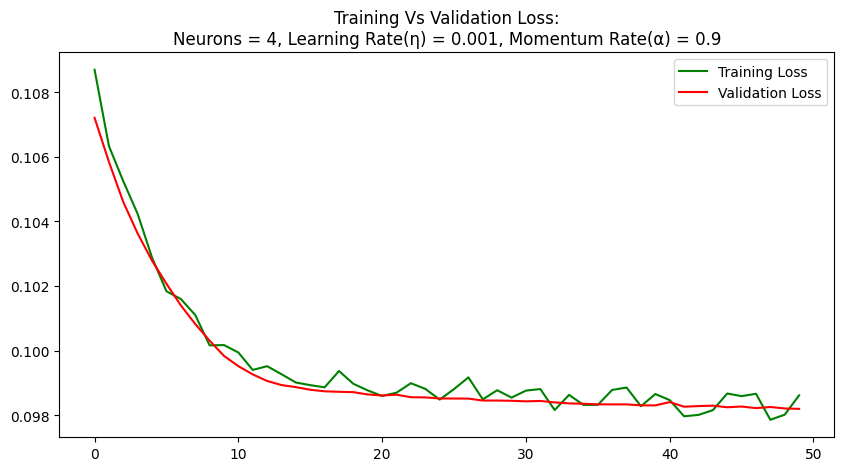

In [37]:
training_loss = model1.training_rmse
validation_loss = model1.validation_rmse
hidden = model1.hidden_neurons
learning = model1.learning_rate
momentum = model1.momentum_rate

print('Minimum training rmse: ' + str(min(training_loss)) + 'At Epoch: ' +  str(training_loss.index(min(training_loss))+1))
print('Minimum validation rmse: ' + str(min(validation_loss)) + 'At Epoch: ' +  str(validation_loss.index(min(validation_loss))+1))

plt.figure(figsize = (10,5), dpi = 100)
plt.plot(training_loss, color = 'green', label = 'Training Loss')
plt.plot(validation_loss, color = 'red', label = 'Validation Loss')
plt.title('Training Vs Validation Loss:\n' +  'Neurons = ' + str(hidden) + ', Learning Rate(η) = ' + str(learning) +
          ', Momentum Rate(α) = ' + str(momentum))
plt.legend()

In [38]:
model2 = Spaceship_lander(X_train, Y_train, X_val, Y_val, learning_rate = 0.001, momentum_rate = 0.9, hidden_neurons = 4,
                     hidden_activation = 'relu', output_activation = 'sigmoid', patience = 5)

In [39]:
model2.epoch(50)

Epoch:  1
Training RMSE: 0.10521938032769637      Validation RMSE: 0.09981779077840422
Epoch:  2
Training RMSE: 0.09930910139050506      Validation RMSE: 0.098735273923902
Epoch:  3
Training RMSE: 0.09885615779028112      Validation RMSE: 0.09863793664637513
Epoch:  4
Training RMSE: 0.09899126987645596      Validation RMSE: 0.09866208527158725
Epoch:  5
Training RMSE: 0.09870929918387739      Validation RMSE: 0.09865243529771478
Epoch:  6
Training RMSE: 0.09935388755737537      Validation RMSE: 0.09871451673751686
Epoch:  7
Training RMSE: 0.09828979461471393      Validation RMSE: 0.09870083208606728
Epoch:  8
Training RMSE: 0.099251812275999      Validation RMSE: 0.09868100004436337
Early stopping at Epoch:  8


Minimum training rmse: 0.09828979461471393At Epoch: 7
Minimum validation rmse: 0.09863793664637513At Epoch: 3


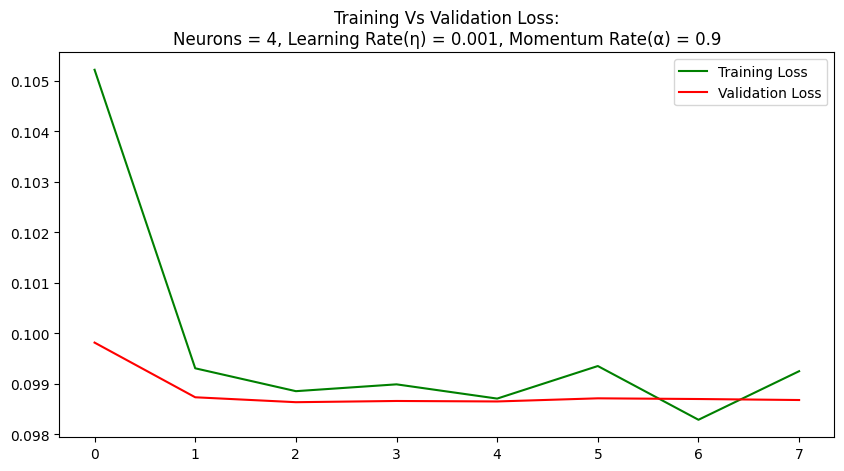

In [40]:
training_loss = model2.training_rmse
validation_loss = model2.validation_rmse
hidden = model2.hidden_neurons
learning = model2.learning_rate
momentum = model2.momentum_rate

print('Minimum training rmse: ' + str(min(training_loss)) + 'At Epoch: ' +  str(training_loss.index(min(training_loss))+1))
print('Minimum validation rmse: ' + str(min(validation_loss)) + 'At Epoch: ' +  str(validation_loss.index(min(validation_loss))+1))

plt.figure(figsize = (10,5), dpi = 100)
plt.plot(training_loss, color = 'green', label = 'Training Loss')
plt.plot(validation_loss, color = 'red', label = 'Validation Loss')
plt.title('Training Vs Validation Loss:\n' +  'Neurons = ' + str(hidden) + ', Learning Rate(η) = ' + str(learning) +
          ', Momentum Rate(α) = ' + str(momentum))
plt.legend()

In [41]:
model3 = Spaceship_lander(X_train, Y_train, X_val, Y_val, learning_rate = 0.001, momentum_rate = 0.9, hidden_neurons = 4,
                     hidden_activation = 'sigmoid', output_activation = 'linear', patience = 5)

In [42]:
model3.epoch(50)

Epoch:  1
Training RMSE: 0.10452290902571594      Validation RMSE: 0.10097441251534361
Epoch:  2
Training RMSE: 0.100050016063009      Validation RMSE: 0.09955334295230067
Epoch:  3
Training RMSE: 0.09956494838350526      Validation RMSE: 0.09980030005407589
Epoch:  4
Training RMSE: 0.09973300169444721      Validation RMSE: 0.09924273996361638
Epoch:  5
Training RMSE: 0.099865227151643      Validation RMSE: 0.09986521231705761
Epoch:  6
Training RMSE: 0.09967490257997916      Validation RMSE: 0.09930599562868131
Epoch:  7
Training RMSE: 0.0992321586574622      Validation RMSE: 0.0993485799210532
Epoch:  8
Training RMSE: 0.0997219334773261      Validation RMSE: 0.09947274991616548
Epoch:  9
Training RMSE: 0.09921944706492178      Validation RMSE: 0.09960565587384489
Early stopping at Epoch:  9


Minimum training rmse: 0.09921944706492178At Epoch: 9
Minimum validation rmse: 0.09924273996361638At Epoch: 4


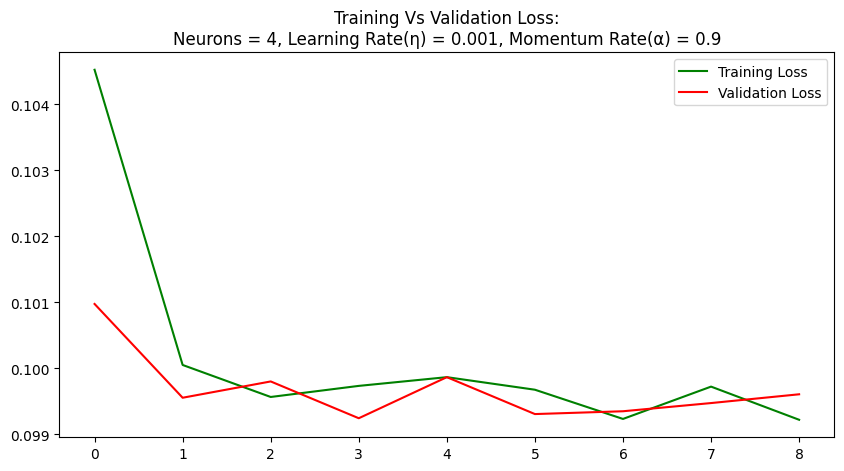

In [46]:
training_loss = model3.training_rmse
validation_loss = model3.validation_rmse
hidden = model3.hidden_neurons
learning = model3.learning_rate
momentum = model3.momentum_rate

print('Minimum training rmse: ' + str(min(training_loss)) + 'At Epoch: ' +  str(training_loss.index(min(training_loss))+1))
print('Minimum validation rmse: ' + str(min(validation_loss)) + 'At Epoch: ' +  str(validation_loss.index(min(validation_loss))+1))

plt.figure(figsize = (10,5), dpi = 100)
plt.plot(training_loss, color = 'green', label = 'Training Loss')
plt.plot(validation_loss, color = 'red', label = 'Validation Loss')
plt.title('Training Vs Validation Loss:\n' +  'Neurons = ' + str(hidden) + ', Learning Rate(η) = ' + str(learning) +
          ', Momentum Rate(α) = ' + str(momentum))
plt.legend()

In [47]:
model4 = Spaceship_lander(X_train, Y_train, X_val, Y_val, learning_rate = 0.001, momentum_rate = 0.9, hidden_neurons = 4,
                     hidden_activation = 'relu', output_activation = 'linear', patience = 5)

In [48]:
model4.epoch(50)

Epoch:  1
Training RMSE: 0.11117305024583565      Validation RMSE: 0.10035520723157468
Epoch:  2
Training RMSE: 0.09987901226629906      Validation RMSE: 0.09939690156140722
Epoch:  3
Training RMSE: 0.09913495795156729      Validation RMSE: 0.09863753123187774
Epoch:  4
Training RMSE: 0.09885464088876761      Validation RMSE: 0.09826966260576252
Epoch:  5
Training RMSE: 0.09814921057296655      Validation RMSE: 0.09788613274754834
Epoch:  6
Training RMSE: 0.09778968872886934      Validation RMSE: 0.09751714434543765
Epoch:  7
Training RMSE: 0.09700055768085371      Validation RMSE: 0.0965862041786838
Epoch:  8
Training RMSE: 0.09728521995088252      Validation RMSE: 0.09695964204689245
Epoch:  9
Training RMSE: 0.09798005754080044      Validation RMSE: 0.09793291981464136
Epoch:  10
Training RMSE: 0.09851921032461601      Validation RMSE: 0.0984897650165483
Epoch:  11
Training RMSE: 0.098401254018727      Validation RMSE: 0.09871459099791469
Epoch:  12
Training RMSE: 0.09845782358405841

Minimum training rmse: 0.09700055768085371At Epoch: 7
Minimum validation rmse: 0.0965862041786838At Epoch: 7


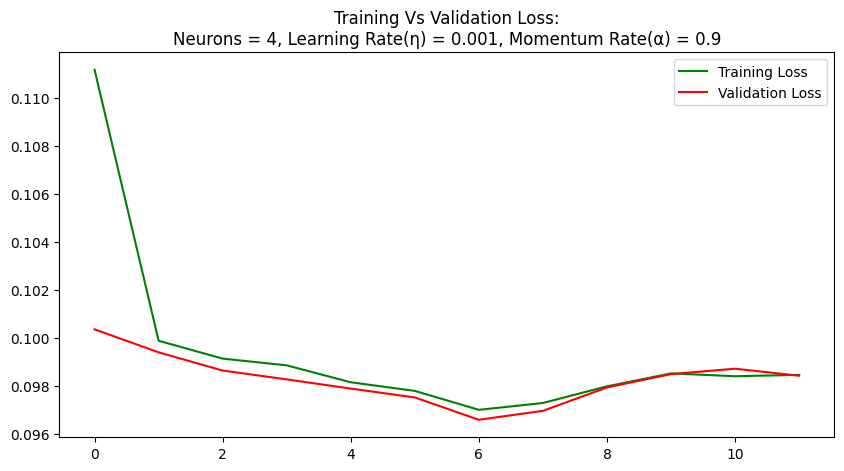

In [49]:
training_loss = model4.training_rmse
validation_loss = model4.validation_rmse
hidden = model4.hidden_neurons
learning = model4.learning_rate
momentum = model4.momentum_rate

print('Minimum training rmse: ' + str(min(training_loss)) + 'At Epoch: ' +  str(training_loss.index(min(training_loss))+1))
print('Minimum validation rmse: ' + str(min(validation_loss)) + 'At Epoch: ' +  str(validation_loss.index(min(validation_loss))+1))

plt.figure(figsize = (10,5), dpi = 100)
plt.plot(training_loss, color = 'green', label = 'Training Loss')
plt.plot(validation_loss, color = 'red', label = 'Validation Loss')
plt.title('Training Vs Validation Loss:\n' +  'Neurons = ' + str(hidden) + ', Learning Rate(η) = ' + str(learning) +
          ', Momentum Rate(α) = ' + str(momentum))
plt.legend()

In [50]:
model5 = Spaceship_lander(X_train, Y_train, X_val, Y_val, learning_rate = 0.001, momentum_rate = 0.9, hidden_neurons = 4,
                     hidden_activation = 'linear', output_activation = 'linear', patience = 5)

In [51]:
model5.epoch(50)

Epoch:  1
Training RMSE: 0.10522988073011368      Validation RMSE: 0.10596246211185587
Epoch:  2
Training RMSE: 0.10067888157383939      Validation RMSE: 0.09920253529023779
Epoch:  3
Training RMSE: 0.10059421722541184      Validation RMSE: 0.09917527591941472
Epoch:  4
Training RMSE: 0.10022512005577454      Validation RMSE: 0.10406673288512805
Epoch:  5
Training RMSE: 0.10067875817344621      Validation RMSE: 0.09946616435863978
Epoch:  6
Training RMSE: 0.10009952145822494      Validation RMSE: 0.10205804521884092
Epoch:  7
Training RMSE: 0.09952790022416302      Validation RMSE: 0.10024031342595528
Epoch:  8
Training RMSE: 0.0999021762719908      Validation RMSE: 0.09928087160002858
Early stopping at Epoch:  8


Minimum training rmse: 0.09952790022416302At Epoch: 7
Minimum validation rmse: 0.09917527591941472At Epoch: 3


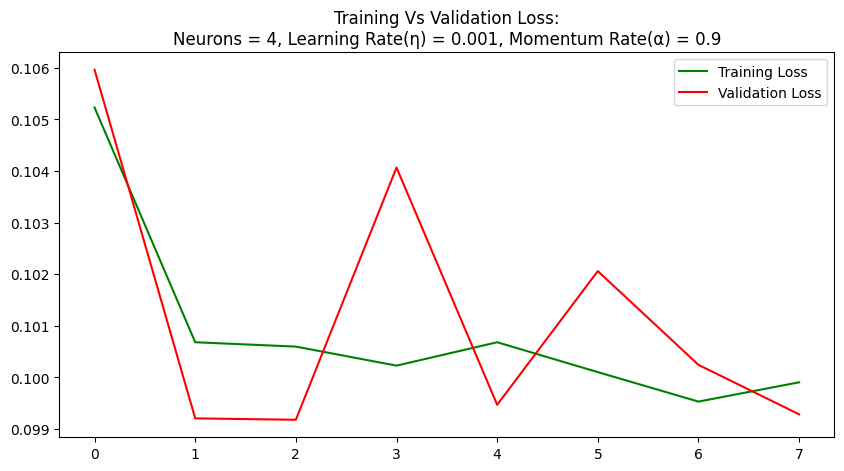

In [52]:
training_loss = model5.training_rmse
validation_loss = model5.validation_rmse
hidden = model5.hidden_neurons
learning = model5.learning_rate
momentum = model5.momentum_rate

print('Minimum training rmse: ' + str(min(training_loss)) + 'At Epoch: ' +  str(training_loss.index(min(training_loss))+1))
print('Minimum validation rmse: ' + str(min(validation_loss)) + 'At Epoch: ' +  str(validation_loss.index(min(validation_loss))+1))

plt.figure(figsize = (10,5), dpi = 100)
plt.plot(training_loss, color = 'green', label = 'Training Loss')
plt.plot(validation_loss, color = 'red', label = 'Validation Loss')
plt.title('Training Vs Validation Loss:\n' +  'Neurons = ' + str(hidden) + ', Learning Rate(η) = ' + str(learning) +
          ', Momentum Rate(α) = ' + str(momentum))
plt.legend()

In [53]:
# print("Number of neurons in First Layer: ", a.input_neurons)
# print("Weights for hidden layer: \n", a.w1)
# print("Number of hidden neurons: ", a.hidden_neurons)
# print("Weights for output layer: \n", a.w2)

In [54]:
# np.savetxt("w1.csv", a.w1, delimiter=",")
# np.savetxt("w2.csv", a.w2, delimiter=",")

### Using Batch training

In [55]:
class batch_training:
    
    def __init__(self, train_feature, train_label, val_feature, val_label,
                 learning_rate, momentum_rate, hidden_neurons, hidden_activation, output_activation, patience, batch_size):
        self.train_feature = train_feature
        self.train_label = train_label
        self.val_feature = val_feature
        self.val_label = val_label
        self.patience = patience
        self.learning_rate = learning_rate
        self.momentum_rate = momentum_rate
        self.batch_size = batch_size
        self.hidden_activation = hidden_activation
        self.output_activation = output_activation
        self.input_neurons = len(train_feature[0])
        self.hidden_neurons = hidden_neurons
        self.output_neurons = len(train_label[0])
        self.bias_neuron = 1
        self.lamb = 0.8
        self.bias = np.array([1])
        
        #self.w1 = np.random.random((self.input_neurons + self.bias_neuron, self.hidden_neurons))
        #self.w2 = np.random.random((self.hidden_neurons + self.bias_neuron, self.output_neurons))
        self.last_w1 = np.zeros([self.input_neurons + self.bias_neuron, self.hidden_neurons])
        self.last_w2 = np.zeros([self.hidden_neurons + self.bias_neuron, self.output_neurons])
        
        self.training_rmse = []
        self.validation_rmse = []
        self.training_iteration = []

        if hidden_activation == 'sigmoid' and hidden_activation == 'linear':#Xavier initialisation
            n = (self.input_neurons + self.bias_neuron) # number of nodes in the previous layer
            lower, upper = -(1.0 / sqrt(n)), (1.0 / sqrt(n)) # calculate the range for the weights
            numbers = rand(n*self.hidden_neurons) # generate random numbers
            scaled = lower + numbers * (upper - lower)# scale to the desired range
            self.w1 = scaled.reshape(self.input_neurons + self.bias_neuron, self.hidden_neurons)
        else:#He initialisation
            n = (self.input_neurons + self.bias_neuron) # number of nodes in the previous layer
            std = sqrt(2.0 / n) # calculate the range for the weights
            numbers = randn(n*self.hidden_neurons) # generate random numbers
            scaled = numbers * std # scale to the desired range
            self.w1 = scaled.reshape(self.input_neurons + self.bias_neuron, self.hidden_neurons) 
        
        if hidden_activation == 'sigmoid' and hidden_activation == 'linear':#Xavier initialisation
            n = (self.hidden_neurons + self.bias_neuron) # number of nodes in the previous layer
            lower, upper = -(1.0 / sqrt(n)), (1.0 / sqrt(n)) # calculate the range for the weights
            numbers = rand(n*self.output_neurons) # generate random numbers
            scaled = lower + numbers * (upper - lower)# scale to the desired range
            self.w2 = scaled.reshape(self.hidden_neurons + self.bias_neuron, self.output_neurons)
        else: #He initialisation
            n = (self.hidden_neurons + self.bias_neuron) # number of nodes in the previous layer
            std = sqrt(2.0 / n) # calculate the range for the weights
            numbers = randn(n*self.output_neurons) # generate random numbers
            scaled = numbers * std # scale to the desired range
            self.w2 = scaled.reshape(self.hidden_neurons + self.bias_neuron, self.output_neurons)        
        
    def sigmoid_activation(self, value):
        for i in range(len(value)):
            value[i] = 1 / (1 + math.exp(-self.lamb*value[i]))
        return value
    
    def relu_activation(self, value):
        for i in range(len(value)):
            value[i] = max(0, value[i])
        return value
    
    def random_index(self, data):
        random_index_list = np.array([])
        for ii in range(len(data)):
            random_index = np.random.randint(len(data))
            random_index_list = np.append(random_index_list, random_index)
            random_index_list = random_index_list.astype(int)
        return random_index_list
    
    def rmse(self, err):
        e1 = err[0]
        e2 = err[1]
        square_errors1 = []
        square_errors2 = []
        for p in range(len(e1)):
            squares1 = (e1[p])**2
            square_errors1.append(squares1)
                
        for q in range(len(e2)):
            squares2 = (e2[q])**2
            square_errors2.append(squares2)
                
        rmse_y1 = (sum(square_errors1)/len(square_errors1))**(1/2)
        rmse_y2 = (sum(square_errors2)/len(square_errors2))**(1/2)
        avg_rmse = (rmse_y1+rmse_y2)/2
            
        return avg_rmse
    
    def training(self, train_feature, train_label):
        y1_error = []
        y2_error = []
        
        random_index = self.random_index(self.train_feature)
        index_number = len(random_index)/self.batch_size
        index_number = math.floor(index_number)
        
        index_list = []
        start = 0
        end = self.batch_size
        for it in range(index_number):
            ab = []
            for be in range(start, end):
                ab.append(random_index[be])
            index_list.append(ab)
            start = start + self.batch_size
            end = end + self.batch_size
            
        for i in range(len(index_list)):
            batch_y1_error = []
            batch_y2_error = []
            avg_delta_w1 = []
            avg_delta_w2 = []
            
            for iti in range(len(index_list[i])):
                
                ele = index_list[i][iti]
            
                h1_input = np.append(self.train_feature[ele], self.bias)
                #print('input to hidden layer: \n', h1_input)
                h1_output = np.matmul(h1_input, self.w1)
                #print('output from hidden layer: \n', h1_output)
            
                if self.hidden_activation == "sigmoid":
                    h1_output = self.sigmoid_activation(h1_output)
                elif self.hidden_activation == "relu":
                    h1_output = self.relu_activation(h1_output)
                else:
                    h1_output = h1_output
            
                h1_output = np.append(h1_output, self.bias)
                #print('sigmoid output from hidden layer: \n', h1_output)
            
                final_output = np.matmul(h1_output, self.w2)
                #print('output from final layer: \n', final_output)
            
                if self.output_activation == "sigmoid":
                    final_output = self.sigmoid_activation(final_output)
                else:
                    final_output = final_output
            
                e = (self.train_label[ele]-final_output)
                #print('error after final layer: \n', e)
            
                batch_y1_error.append(e[0])
                batch_y2_error.append(e[1])
                
                g_output = []
                if self.output_activation == "sigmoid":
                    for l in range(self.output_neurons):
                        g_output_ele = self.lamb * final_output[l] * (1-final_output[l]) * e[l]
                        g_output.append(g_output_ele)
                    g_output = np.array(g_output)
                else:
                    for l in range(self.output_neurons):
                        g_output_ele = 1*e[l]
                        g_output.append(g_output_ele)
                    g_output = np.array(g_output) 
                #print('gradients at final layer: \n', g_output)
        
                g_hidden = []
                if self.hidden_activation == "sigmoid":
                    for m in range(len(h1_output)-1):
                        g_hidden_ele = self.lamb * h1_output[m] * (1-h1_output[m]) * ((g_output[0] * self.w2[m][0])+(g_output[1] * self.w2[m][1]))
                        g_hidden.append(g_hidden_ele)
                    g_hidden = np.array(g_hidden)
                elif self.hidden_activation == "relu":
                    for m in range(len(h1_output)-1):
                        if h1_output[m] < 0:
                            g_hidden_ele = 0
                        else:
                            g_hidden_ele = ((g_output[0] * self.w2[m][0])+(g_output[1] * self.w2[m][1]))
                        g_hidden.append(g_hidden_ele)
                    g_hidden = np.array(g_hidden)
                else:
                    for m in range(len(h1_output)-1):
                        g_hidden_ele = ((g_output[0] * self.w2[m][0])+(g_output[1] * self.w2[m][1]))
                        g_hidden.append(g_hidden_ele)
                    g_hidden = np.array(g_hidden)
                #print('gradients at hidden layer: \n', g_hidden)
        
                delta_w2 = []
                for n in range(len(self.w2)):
                    o = []
                    for p in range(len(self.w2[n])):
                        delta_w2_ele = self.learning_rate * g_output[p] * h1_output[n]
                        o.append(delta_w2_ele)
                    delta_w2.append(o)
                delta_w2 = np.array(delta_w2)
                delta_w2 = delta_w2 + (self.momentum_rate * self.last_w2)
                avg_delta_w2.append(delta_w2)
                #print('delta_w2: \n', delta_w2)
            
                delta_w1 = []
                for r in range(len(self.w1)):
                    t = []
                    for s in range(len(self.w1[r])):
                        delta_w1_ele = self.learning_rate * g_hidden[s] * h1_input[r]
                        t.append(delta_w1_ele)
                    delta_w1.append(t)
                delta_w1 = np.array(delta_w1)
                delta_w1 = delta_w1 + (self.momentum_rate * self.last_w1)
                avg_delta_w1.append(delta_w1)
                #print('delta_w1: \n', delta_w1)
            
            avg_delta_w1 = sum(avg_delta_w1)/len(avg_delta_w1)
            avg_delta_w2 = sum(avg_delta_w2)/len(avg_delta_w2)
              
            for q in range(len(self.w2)):
                self.w2[q] = self.w2[q] + avg_delta_w2[q]       
            #print('updated weights for final layer: \n', w2)
        
            for qq in range(len(self.last_w2)):
                self.last_w2[qq] = avg_delta_w2[qq] 
                        
            #updating weights for hidden layer
            for u in range(len(self.w1)):
                self.w1[u] = self.w1[u] + avg_delta_w1[u]
            #print('updated weights for hidden layer: \n', w1)
        
            for uu in range(len(self.last_w1)):
                self.last_w1[uu] = avg_delta_w1[uu]
            
            y1_error.append(sum(batch_y1_error)/len(batch_y1_error))
            y2_error.append(sum(batch_y2_error)/len(batch_y2_error))

        return y1_error, y2_error
            
    def validation(self, val_feature, val_label):
        y1_error = []
        y2_error = []
        
        random_index = self.random_index(self.train_feature)
        index_number = len(random_index)/self.batch_size
        index_number = math.floor(index_number)
        
        index_list = []
        start = 0
        end = self.batch_size
        for it in range(index_number):
            ab = []
            for be in range(start, end):
                ab.append(random_index[be])
            index_list.append(ab)
            start = start + self.batch_size
            end = end + self.batch_size
            
        for i in range(len(index_list)):
            batch_y1_error = []
            batch_y2_error = []
            
            for iti in range(len(index_list[i])):
                
                ele = index_list[i][iti]
            
                h1_input = np.append(self.train_feature[ele], self.bias)
                #print('input to hidden layer: \n', h1_input)
                h1_output = np.matmul(h1_input, self.w1)
                #print('output from hidden layer: \n', h1_output)
            
                if self.hidden_activation == "sigmoid":
                    h1_output = self.sigmoid_activation(h1_output)
                elif self.hidden_activation == "relu":
                    h1_output = self.relu_activation(h1_output)
                else:
                    h1_output = h1_output
            
                h1_output = np.append(h1_output, self.bias)
                #print('sigmoid output from hidden layer: \n', h1_output)
            
                final_output = np.matmul(h1_output, self.w2)
                #print('output from final layer: \n', final_output)
            
                if self.output_activation == "sigmoid":
                    final_output = self.sigmoid_activation(final_output)
                else:
                    final_output = final_output
            
                e = (self.train_label[ele]-final_output)
                #print('error after final layer: \n', e)
            
                batch_y1_error.append(e[0])
                batch_y2_error.append(e[1])
                              
            y1_error.append(sum(batch_y1_error)/len(batch_y1_error))
            y2_error.append(sum(batch_y2_error)/len(batch_y2_error))

        return y1_error, y2_error
    
    def predict(self, a):
        y = []
        
        for i in range(len(a)):
            ele = i
            
            h1_input = np.append(a[ele], self.bias)
            #print('input to hidden layer: \n', h1_input)
            h1_output = np.matmul(h1_input, self.w1)
            #print('output from hidden layer: \n', h1_output)
            
            if self.hidden_activation == "sigmoid":
                h1_output = self.sigmoid_activation(h1_output)
            elif self.hidden_activation == "relu":
                h1_output = self.relu_activation(h1_output)
            else:
                h1_output = h1_output
            
            h1_output = np.append(h1_output, self.bias)
            #print('sigmoid output from hidden layer: \n', h1_output)
            
            final_output = np.matmul(h1_output, self.w2)
            #print('output from final layer: \n', final_output)
            
            if self.output_activation == "sigmoid":
                final_output = self.sigmoid_activation(final_output)
            else:
                final_output = final_output
            
            y.append(final_output)
            
        return y
    
    def epoch(self, epoch_no):
        for iteration in range(epoch_no):
            print('Epoch: ', iteration + 1)
            self.training_iteration.append(iteration+1)
            train_error = self.training(self.train_feature, self.train_label)
            train_rmse = self.rmse(train_error)
            self.training_rmse.append(train_rmse)
            #print('Training RMSE: ', train_rmse)
            
            val_error = self.validation(self.val_feature, self.val_label)
            val_rmse = self.rmse(val_error)
            self.validation_rmse.append(val_rmse)
            print('Training RMSE: ' + str(train_rmse) + '      Validation RMSE: ' + str(val_rmse))
            
            count = 0
            ind = -1
            if len(self.validation_rmse)>self.patience:
                for i in range(self.patience):
                    if self.validation_rmse[ind] > min(self.validation_rmse):
                        count = count + 1
                        ind = ind -1
                if count >= self.patience:
                    print('Early stopping at Epoch: ', iteration+1)
                    break

In [56]:
model = batch_training(X_train, Y_train, X_val, Y_val, learning_rate = 0.001, momentum_rate = 0.9, hidden_neurons = 4,
                     hidden_activation = 'sigmoid', output_activation = 'sigmoid', patience = 3, batch_size = 10)

In [57]:
model.epoch(50)

Epoch:  1
Training RMSE: 0.07028429570873915      Validation RMSE: 0.03396186305745599
Epoch:  2
Training RMSE: 0.03420855135812258      Validation RMSE: 0.03395312775482632
Epoch:  3
Training RMSE: 0.03387158850569532      Validation RMSE: 0.03368242121841316
Epoch:  4
Training RMSE: 0.03396455634530676      Validation RMSE: 0.03383022944474619
Epoch:  5
Training RMSE: 0.03410274627590376      Validation RMSE: 0.03329794630416269
Epoch:  6
Training RMSE: 0.033626625614296204      Validation RMSE: 0.0338704022512258
Epoch:  7
Training RMSE: 0.03348258145237774      Validation RMSE: 0.03374018328115123
Epoch:  8
Training RMSE: 0.03369988862674525      Validation RMSE: 0.03394206818429091
Early stopping at Epoch:  8


Minimum training rmse: 0.03348258145237774At Epoch: 7
Minimum validation rmse: 0.03329794630416269At Epoch: 5


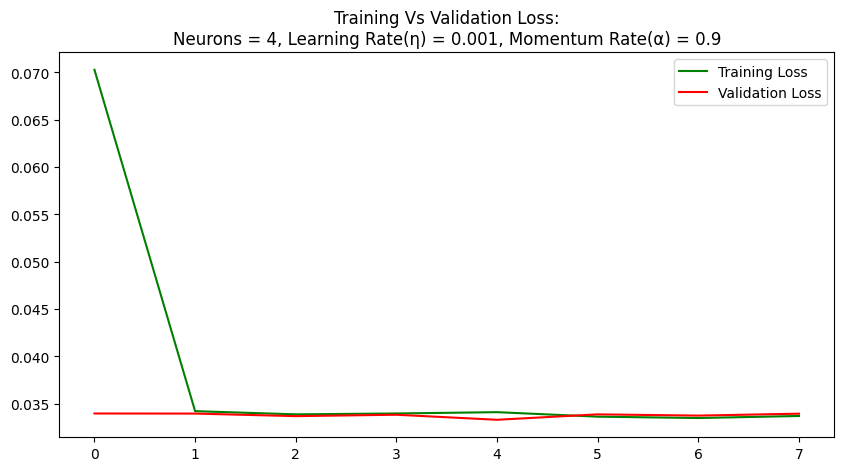

In [58]:
training_loss = model.training_rmse
validation_loss = model.validation_rmse
hidden = model.hidden_neurons
learning = model.learning_rate
momentum = model.momentum_rate

print('Minimum training rmse: ' + str(min(training_loss)) + 'At Epoch: ' +  str(training_loss.index(min(training_loss))+1))
print('Minimum validation rmse: ' + str(min(validation_loss)) + 'At Epoch: ' +  str(validation_loss.index(min(validation_loss))+1))

plt.figure(figsize = (10,5), dpi = 100)
plt.plot(training_loss, color = 'green', label = 'Training Loss')
plt.plot(validation_loss, color = 'red', label = 'Validation Loss')
plt.title('Training Vs Validation Loss:\n' +  'Neurons = ' + str(hidden) + ', Learning Rate(η) = ' + str(learning) +
          ', Momentum Rate(α) = ' + str(momentum))
plt.legend()

In [59]:
model1 = batch_training(X_train, Y_train, X_val, Y_val, learning_rate = 0.001, momentum_rate = 0.9, hidden_neurons = 4,
                     hidden_activation = 'relu', output_activation = 'sigmoid', patience = 5, batch_size = 10)

In [60]:
model1.epoch(50)

Epoch:  1
Training RMSE: 0.0708377896504905      Validation RMSE: 0.0368905245220235
Epoch:  2
Training RMSE: 0.03558113925556647      Validation RMSE: 0.035576230973950865
Epoch:  3
Training RMSE: 0.03572834697707079      Validation RMSE: 0.03490273366836758
Epoch:  4
Training RMSE: 0.034920813830124735      Validation RMSE: 0.03455838518740959
Epoch:  5
Training RMSE: 0.03433841719733397      Validation RMSE: 0.03388412300008052
Epoch:  6
Training RMSE: 0.0340087409508016      Validation RMSE: 0.03426178570845827
Epoch:  7
Training RMSE: 0.034000177301435716      Validation RMSE: 0.03402762217917248
Epoch:  8
Training RMSE: 0.0334322472834942      Validation RMSE: 0.033479192228683036
Epoch:  9
Training RMSE: 0.03356708999560869      Validation RMSE: 0.033233403994409265
Epoch:  10
Training RMSE: 0.03342926858671074      Validation RMSE: 0.03342719751532345
Epoch:  11
Training RMSE: 0.033174681965803185      Validation RMSE: 0.0332412962878106
Epoch:  12
Training RMSE: 0.033384232058

Minimum training rmse: 0.032807087824197334At Epoch: 16
Minimum validation rmse: 0.03284889637966727At Epoch: 12


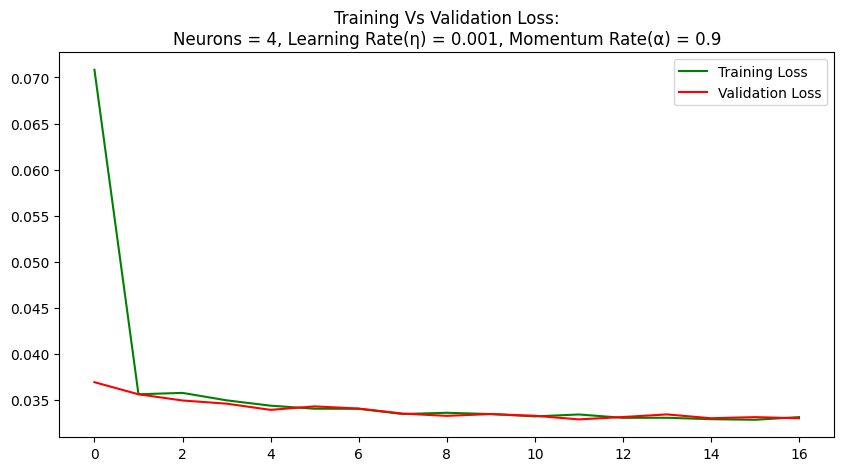

In [61]:
training_loss = model1.training_rmse
validation_loss = model1.validation_rmse
hidden = model1.hidden_neurons
learning = model1.learning_rate
momentum = model1.momentum_rate

print('Minimum training rmse: ' + str(min(training_loss)) + 'At Epoch: ' +  str(training_loss.index(min(training_loss))+1))
print('Minimum validation rmse: ' + str(min(validation_loss)) + 'At Epoch: ' +  str(validation_loss.index(min(validation_loss))+1))

plt.figure(figsize = (10,5), dpi = 100)
plt.plot(training_loss, color = 'green', label = 'Training Loss')
plt.plot(validation_loss, color = 'red', label = 'Validation Loss')
plt.title('Training Vs Validation Loss:\n' +  'Neurons = ' + str(hidden) + ', Learning Rate(η) = ' + str(learning) +
          ', Momentum Rate(α) = ' + str(momentum))
plt.legend()

In [62]:
model2 = batch_training(X_train, Y_train, X_val, Y_val, learning_rate = 0.001, momentum_rate = 0.9, hidden_neurons = 4,
                     hidden_activation = 'relu', output_activation = 'linear', patience = 5, batch_size = 10)

In [63]:
model2.epoch(50)

Epoch:  1
Training RMSE: 0.05294763820938472      Validation RMSE: 0.032760324003876504
Epoch:  2
Training RMSE: 0.03229688006740654      Validation RMSE: 0.03233345210654774
Epoch:  3
Training RMSE: 0.032561451206520216      Validation RMSE: 0.03342276421363253
Epoch:  4
Training RMSE: 0.03438306798336019      Validation RMSE: 0.03546639903411775
Epoch:  5
Training RMSE: 0.036884311608432946      Validation RMSE: 0.036076451373841426
Epoch:  6
Training RMSE: 0.03601108749285779      Validation RMSE: 0.03599043789157213
Epoch:  7
Training RMSE: 0.035209818579541335      Validation RMSE: 0.0347518729463224
Early stopping at Epoch:  7


Minimum training rmse: 0.03229688006740654At Epoch: 2
Minimum validation rmse: 0.03233345210654774At Epoch: 2


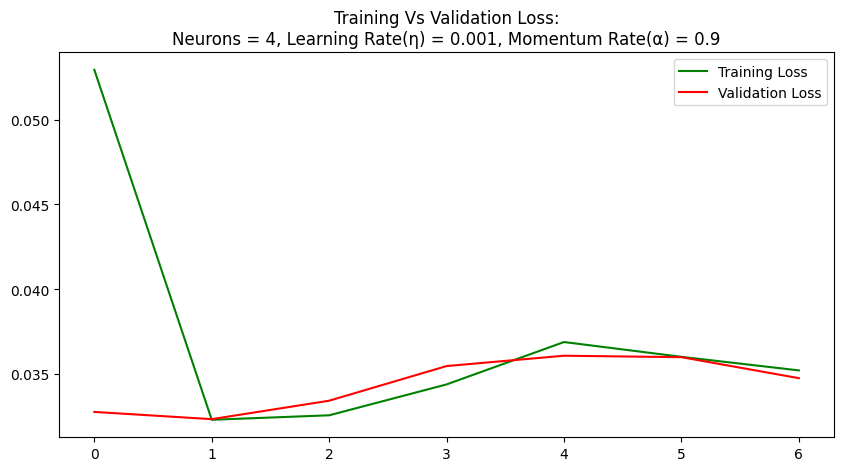

In [64]:
training_loss = model2.training_rmse
validation_loss = model2.validation_rmse
hidden = model2.hidden_neurons
learning = model2.learning_rate
momentum = model2.momentum_rate

print('Minimum training rmse: ' + str(min(training_loss)) + 'At Epoch: ' +  str(training_loss.index(min(training_loss))+1))
print('Minimum validation rmse: ' + str(min(validation_loss)) + 'At Epoch: ' +  str(validation_loss.index(min(validation_loss))+1))

plt.figure(figsize = (10,5), dpi = 100)
plt.plot(training_loss, color = 'green', label = 'Training Loss')
plt.plot(validation_loss, color = 'red', label = 'Validation Loss')
plt.title('Training Vs Validation Loss:\n' +  'Neurons = ' + str(hidden) + ', Learning Rate(η) = ' + str(learning) +
          ', Momentum Rate(α) = ' + str(momentum))
plt.legend()